***Tutorial:***
https://huggingface.co/learn/cookbook/multimodal_rag_using_document_retrieval_and_smol_vlm#4-retrieving-documents-with-the-document-retrieval-model-

Need GPU enabled in this notebook to able to initialize the model

In [1]:
!pip install -q git+https://github.com/sergiopaniego/byaldi.git@colsmolvlm-support

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.9/517.9 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 95.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 70.9 MB/s eta 0:00:00:00:01


In [2]:
from datasets import load_dataset

dataset = load_dataset("sergiopaniego/ourworldindata_example", split="train")

README.md:   0%|          | 0.00/328 [00:00<?, ?B/s]

(…)-standardized-deaths-from-all-causes.png:   0%|          | 0.00/932k [00:00<?, ?B/s]

annual-death-rate-by-age-group.png:   0%|          | 0.00/505k [00:00<?, ?B/s]

(…)rates-in-different-age-groups-by-sex.png:   0%|          | 0.00/483k [00:00<?, ?B/s]

(…)-death-rates-in-different-age-groups.png:   0%|          | 0.00/669k [00:00<?, ?B/s]

(…)le-and-male-life-expectancy-at-birth.png:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

(…)ncy-vs-health-expenditure-per-capita.png:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

life-expectancy-hmd-unwpp.png:   0%|          | 0.00/950k [00:00<?, ?B/s]

life-expectancy.png:   0%|          | 0.00/682k [00:00<?, ?B/s]

life-expectation-at-birth-by-sex.png:   0%|          | 0.00/568k [00:00<?, ?B/s]

(…)at-year-among-females-of-a-given-age.png:   0%|          | 0.00/835k [00:00<?, ?B/s]

(…)that-year-among-males-of-a-given-age.png:   0%|          | 0.00/876k [00:00<?, ?B/s]

(…)die-in-the-first-year-of-life-by-sex.png:   0%|          | 0.00/490k [00:00<?, ?B/s]

(…)ng-life-expectancy-at-different-ages.png:   0%|          | 0.00/547k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/13 [00:00<?, ? examples/s]

In [3]:
import os
from PIL import Image


def save_images_to_local(dataset, output_folder="data/"):
    os.makedirs(output_folder, exist_ok=True)

    for image_id, image_data in enumerate(dataset):
        image = image_data["image"]

        if isinstance(image, str):
            image = Image.open(image)

        output_path = os.path.join(output_folder, f"image_{image_id}.png")

        image.save(output_path, format="PNG")

        print(f"Image saved in: {output_path}")


save_images_to_local(dataset)

Image saved in: data/image_0.png
Image saved in: data/image_1.png
Image saved in: data/image_2.png
Image saved in: data/image_3.png
Image saved in: data/image_4.png
Image saved in: data/image_5.png
Image saved in: data/image_6.png
Image saved in: data/image_7.png
Image saved in: data/image_8.png
Image saved in: data/image_9.png
Image saved in: data/image_10.png
Image saved in: data/image_11.png
Image saved in: data/image_12.png


In [4]:
import os
from PIL import Image


def load_png_images(image_folder):
    png_files = [f for f in os.listdir(image_folder) if f.endswith(".png")]
    all_images = {}

    for image_id, png_file in enumerate(png_files):
        image_path = os.path.join(image_folder, png_file)
        image = Image.open(image_path)
        all_images[image_id] = image

    return all_images


all_images = load_png_images("/kaggle/working/data")

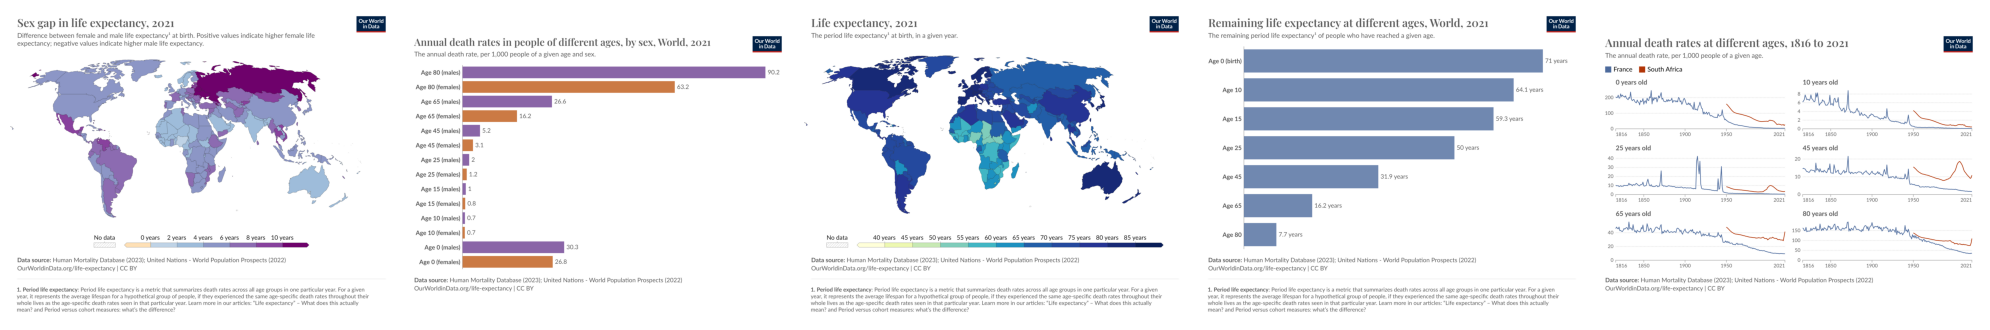

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(20, 15))

for i, ax in enumerate(axes.flat):
    img = all_images[i]
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [6]:
from byaldi import RAGMultiModalModel

docs_retrieval_model = RAGMultiModalModel.from_pretrained("vidore/colsmolvlm-alpha")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


adapter_config.json:   0%|          | 0.00/741 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/63.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.63G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/72.4M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/489 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.43k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/430 [00:00<?, ?B/s]

Some kwargs in processor config are unused and will not have any effect: image_seq_len. 


In [10]:
import gc

gc.collect()

0

In [8]:
docs_retrieval_model.index(
    input_path="data/", index_name="image_index", store_collection_with_index=False, overwrite=True
)

Indexing file: data/image_4.png
Added page 1 of document 0 to index.
Index exported to .byaldi/image_index
Indexing file: data/image_2.png
Added page 1 of document 1 to index.
Index exported to .byaldi/image_index
Indexing file: data/image_6.png
Added page 1 of document 2 to index.
Index exported to .byaldi/image_index
Indexing file: data/image_12.png
Added page 1 of document 3 to index.
Index exported to .byaldi/image_index
Indexing file: data/image_3.png
Added page 1 of document 4 to index.
Index exported to .byaldi/image_index
Indexing file: data/image_5.png
Added page 1 of document 5 to index.
Index exported to .byaldi/image_index
Indexing file: data/image_8.png
Added page 1 of document 6 to index.
Index exported to .byaldi/image_index
Indexing file: data/image_9.png
Added page 1 of document 7 to index.
Index exported to .byaldi/image_index
Indexing file: data/image_11.png
Added page 1 of document 8 to index.
Index exported to .byaldi/image_index
Indexing file: data/image_7.png
Add

{0: 'data/image_4.png',
 1: 'data/image_2.png',
 2: 'data/image_6.png',
 3: 'data/image_12.png',
 4: 'data/image_3.png',
 5: 'data/image_5.png',
 6: 'data/image_8.png',
 7: 'data/image_9.png',
 8: 'data/image_11.png',
 9: 'data/image_7.png',
 10: 'data/image_1.png',
 11: 'data/image_0.png',
 12: 'data/image_10.png'}

In [9]:
text_query = "What is the overall trend in life expectancy across different countries and regions?"

results = docs_retrieval_model.search(text_query, k=1)
results

[{'doc_id': 9, 'page_num': 1, 'score': 22.0, 'metadata': {}, 'base64': None}]

In [ ]:
from IPython.display import Image, display

# Path to the image in the Kaggle environment
image_path = "/kaggle/working/data/image_11.png"

# Display the image
display(Image(filename=image_path))

In [ ]:
result_image = all_images[results[0]["doc_id"]]
result_image

In [ ]:
from transformers import Idefics3ForConditionalGeneration, AutoProcessor
import torch


model_id = "HuggingFaceTB/SmolVLM-Instruct"
vl_model = Idefics3ForConditionalGeneration.from_pretrained(
    model_id,
    device_map="auto",
    torch_dtype=torch.bfloat16,
    _attn_implementation="eager",
)
vl_model.eval()

In [ ]:
vl_model_processor = AutoProcessor.from_pretrained(model_id)

In [14]:
chat_template = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
            },
            {"type": "text", "text": text_query},
        ],
    }
]

text = vl_model_processor.apply_chat_template(chat_template, add_generation_prompt=True)

In [15]:
inputs = vl_model_processor(
    text=text,
    images=[result_image],
    return_tensors="pt",
)
inputs = inputs.to("cuda")

In [16]:
generated_ids = vl_model.generate(**inputs, max_new_tokens=500)

In [18]:
generated_ids_trimmed = [out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)]

output_text = vl_model_processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)

In [19]:
print(output_text[0])

 The overall trend in life expectancy across different countries and regions is an increase over time.


Now, let’s take a look at the memory consumption of the SmolVLM to understand its resource usage.

In [20]:
print(f"GPU allocated memory: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")
print(f"GPU reserved memory: {torch.cuda.memory_reserved() / 1024**3:.2f} GB")

GPU allocated memory: 8.32 GB
GPU reserved memory: 10.38 GB


In [21]:
def answer_with_multimodal_rag(
    vl_model, docs_retrieval_model, vl_model_processor, all_images, text_query, retrival_top_k, max_new_tokens
):
    results = docs_retrieval_model.search(text_query, k=retrival_top_k)
    result_image = all_images[results[0]["doc_id"]]

    chat_template = [
        {
            "role": "user",
            "content": [{"type": "image"}, {"type": "text", "text": text_query}],
        }
    ]

    # Prepare the inputs
    text = vl_model_processor.apply_chat_template(chat_template, add_generation_prompt=True)
    inputs = vl_model_processor(
        text=text,
        images=[result_image],
        return_tensors="pt",
    )
    inputs = inputs.to("cuda")

    # Generate text from the vl_model
    generated_ids = vl_model.generate(**inputs, max_new_tokens=max_new_tokens)
    generated_ids_trimmed = [out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)]

    # Decode the generated text
    output_text = vl_model_processor.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )

    return output_text

In [22]:
output_text = answer_with_multimodal_rag(
    vl_model=vl_model,
    docs_retrieval_model=docs_retrieval_model,
    vl_model_processor=vl_model_processor,
    all_images=all_images,
    text_query="What is the overall trend in life expectancy across different countries and regions?",
    retrival_top_k=1,
    max_new_tokens=500,
)
print(output_text[0])

 The overall trend in life expectancy across different countries and regions is an increase over time.
